# YELP dataset
From the [website](https://www.yelp.com/dataset)

> The Yelp dataset is a subset of our businesses, reviews, and user data for use in connection with academic research. Available as JSON files, use it to teach students about databases, to learn NLP, or for sample production data while you learn how to make mobile apps.

Provides about **7.000.000 reviews** on **150.000 business activitites** in **11 metropolitan areas** mainly across the USA.

We are going to use a subset of those data stored locally (not available on GitHub). The full dataset can be downloaded [here](https://www.yelp.com/dataset).

In [2]:
import pandas as pd 
import yelp.loader as ld 

In [3]:
yelp = ld.load_sample()

## Introduction to the Vector Space Model

**Categories as features**

In [15]:
import numpy as np 
import matplotlib.pyplot as plt

In [27]:
docs = []
for doc in yelp:
    docs.append(dict([(c, 1) for c in doc['categories']]))
X = pd.DataFrame(docs).fillna(0)

In [28]:
X.head()

,American (Traditional),Burgers,Restaurants,Himalayan/Nepalese,Indian,Bars,Beer,Food,Italian,Nightlife,...,Septic Services,Japanese Curry,Furniture Reupholstery,Siding,Screen Printing,Snow Removal,Private Investigation,Tai Chi,Ski Resorts,Vacation Rental Agents
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
S = X[X.columns[:2]]

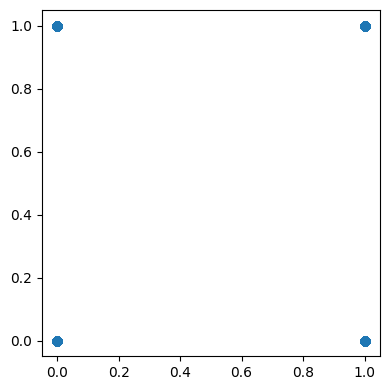

In [17]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(S['American (Traditional)'], S['Burgers'])
plt.tight_layout()
plt.show()

**Tokenization**

In [29]:
from collections import Counter

In [34]:
docs = []
for doc in yelp[:500]:
    text = doc['content']
    tokens = text.split()
    docs.append(dict(Counter(tokens).most_common()))
X = pd.DataFrame(docs).fillna(0)

In [40]:
X.head()

,and,a,great,the,was,with,hit,of,side,this,...,"best,",Employees,responsible,disorganized.,honor,seriously),aluminum,"foil,",packaging,lousy
0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,6.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
X.loc[0].sort_values(ascending=False)

and       3.0
great     3.0
the       3.0
a         3.0
of        2.0
         ... 
You'll    0.0
friend    0.0
To        0.0
story     0.0
lousy     0.0
Name: 0, Length: 10238, dtype: float64